In [1]:
import sys
from time import gmtime, strftime
import os

import boto3
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle as pkl


In [2]:
df = pd.read_csv('data/employee-attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df[[col for col, dtype in df.dtypes.items() if dtype==object]]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Attrition (object): 2
No: 1233
Yes: 237


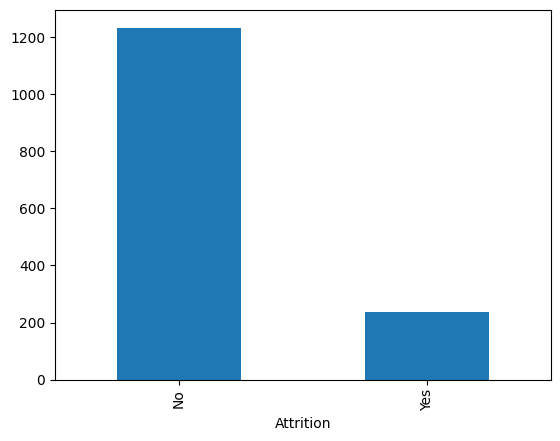

BusinessTravel (object): 3
Travel_Rarely: 1043
Travel_Frequently: 277
Non-Travel: 150


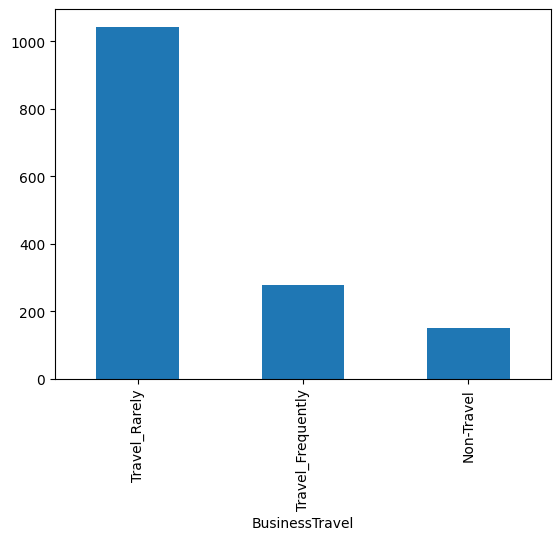

DailyRate (int64): 886
691: 6
408: 5
530: 5
1329: 5
1082: 5


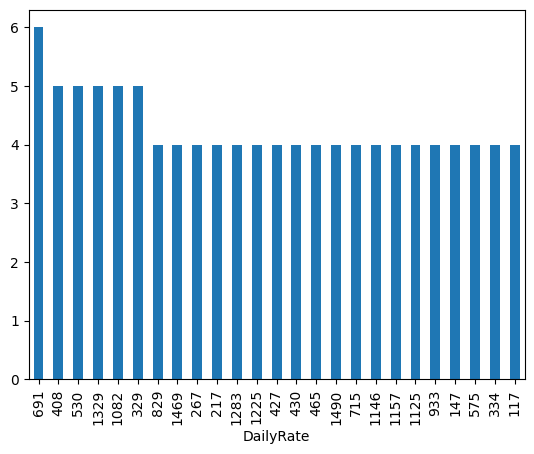

Department (object): 3
Research & Development: 961
Sales: 446
Human Resources: 63


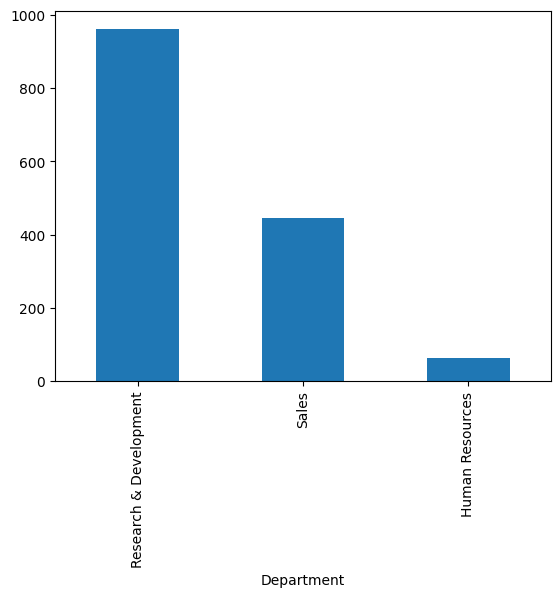

DistanceFromHome (int64): 29
2: 211
1: 208
10: 86
9: 85
3: 84


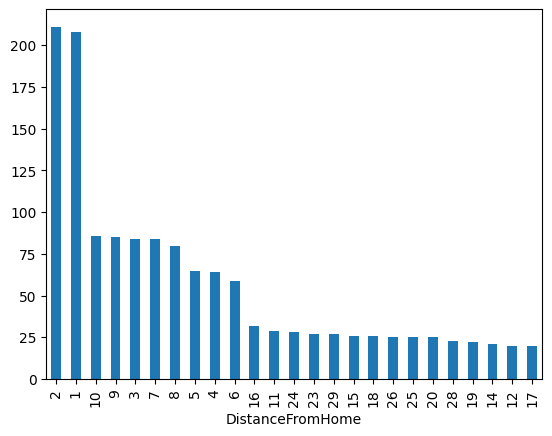

Education (int64): 5
3: 572
4: 398
2: 282
1: 170
5: 48


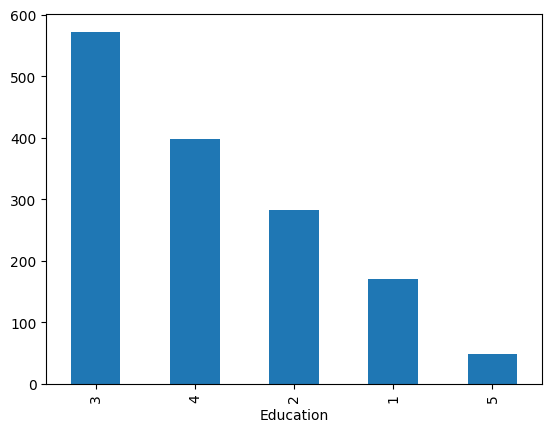

EducationField (object): 6
Life Sciences: 606
Medical: 464
Marketing: 159
Technical Degree: 132
Other: 82


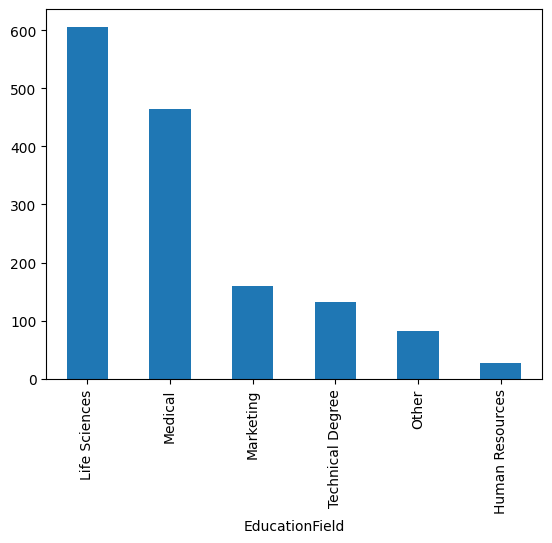

EmployeeCount (int64): 1
1: 1470


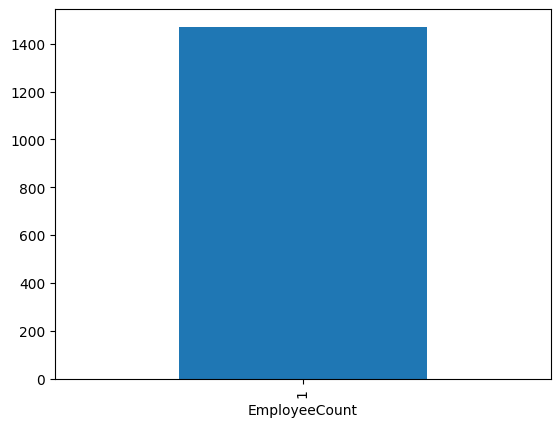

EmployeeNumber (int64): 1470
1: 1
1391: 1
1389: 1
1387: 1
1383: 1


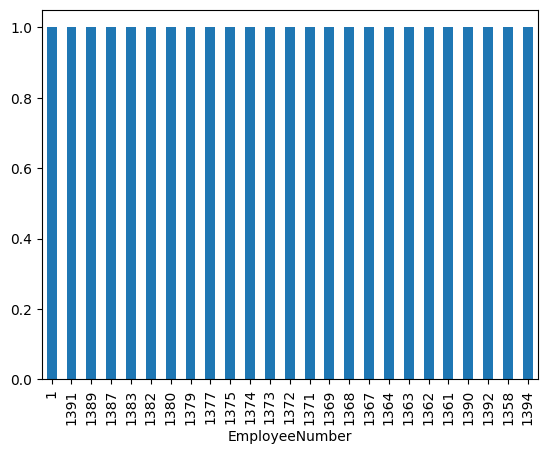

EnvironmentSatisfaction (int64): 4
3: 453
4: 446
2: 287
1: 284


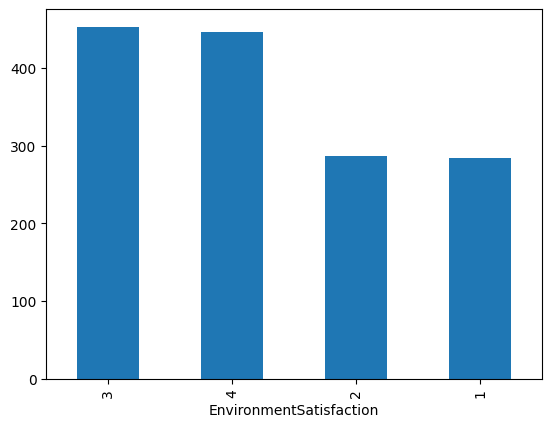

Gender (object): 2
Male: 882
Female: 588


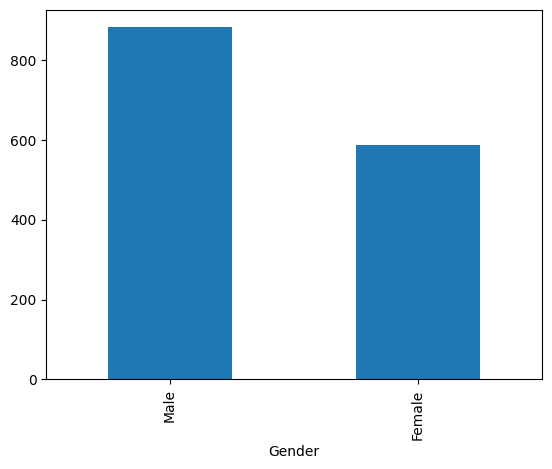

HourlyRate (int64): 71
66: 29
98: 28
42: 28
48: 28
84: 28


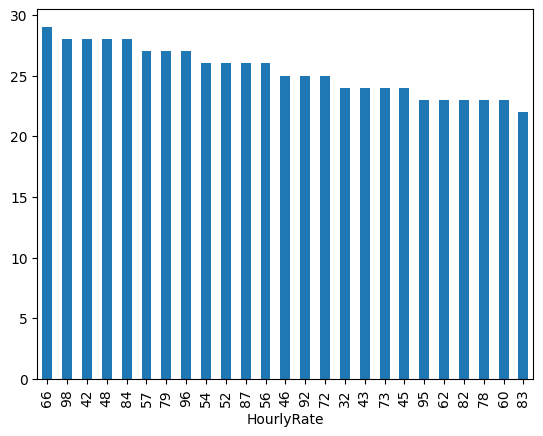

JobInvolvement (int64): 4
3: 868
2: 375
4: 144
1: 83


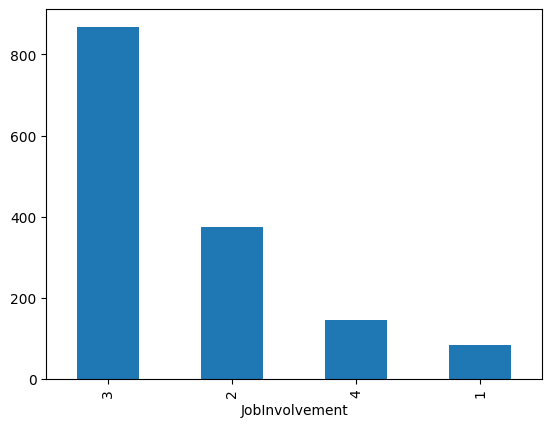

JobLevel (int64): 5
1: 543
2: 534
3: 218
4: 106
5: 69


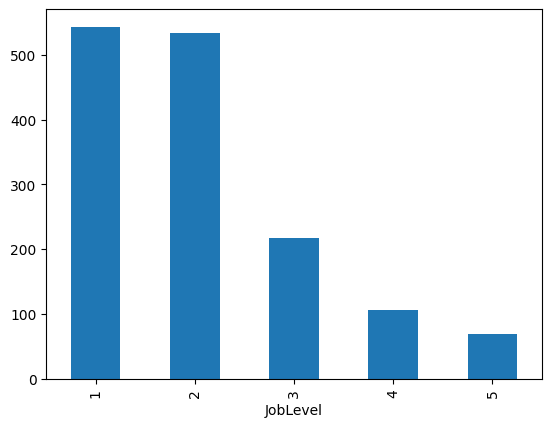

JobRole (object): 9
Sales Executive: 326
Research Scientist: 292
Laboratory Technician: 259
Manufacturing Director: 145
Healthcare Representative: 131


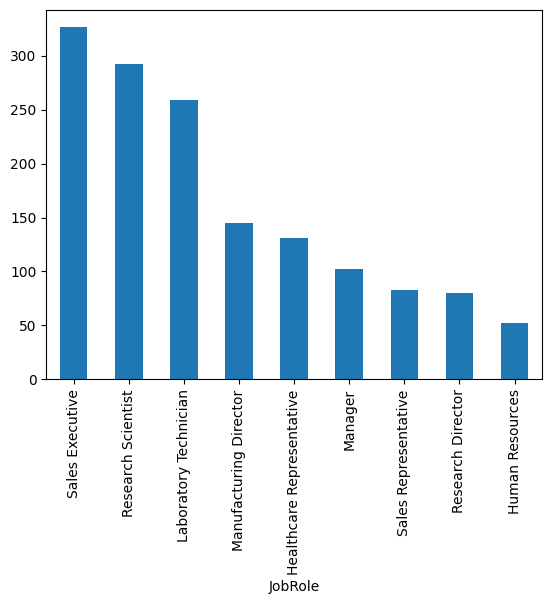

JobSatisfaction (int64): 4
4: 459
3: 442
1: 289
2: 280


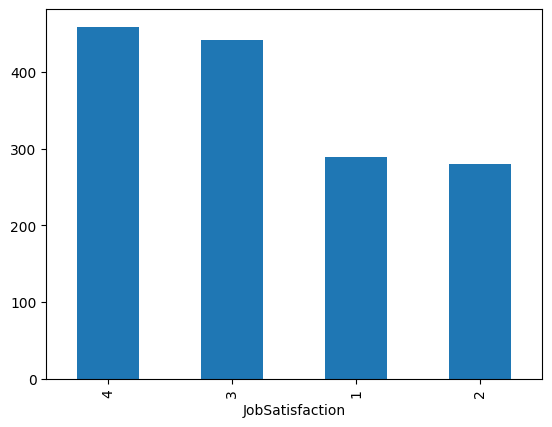

MaritalStatus (object): 3
Married: 673
Single: 470
Divorced: 327


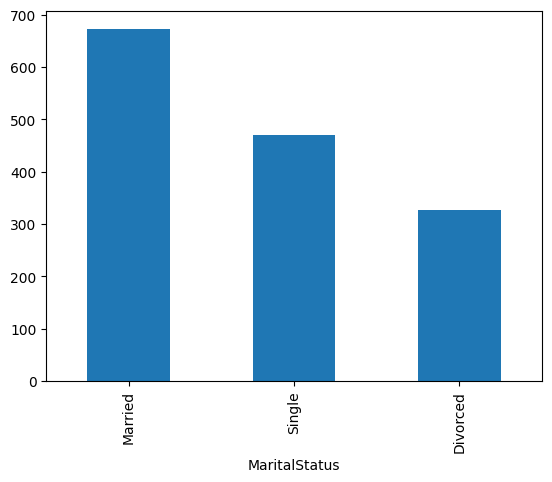

MonthlyIncome (int64): 1349
2342: 4
6142: 3
2741: 3
2559: 3
2610: 3


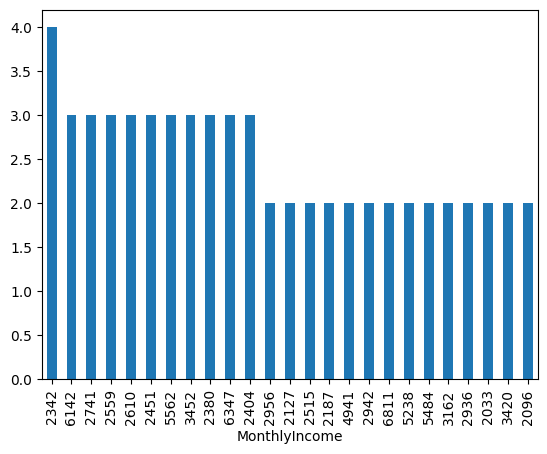

MonthlyRate (int64): 1427
4223: 3
9150: 3
9558: 2
12858: 2
22074: 2


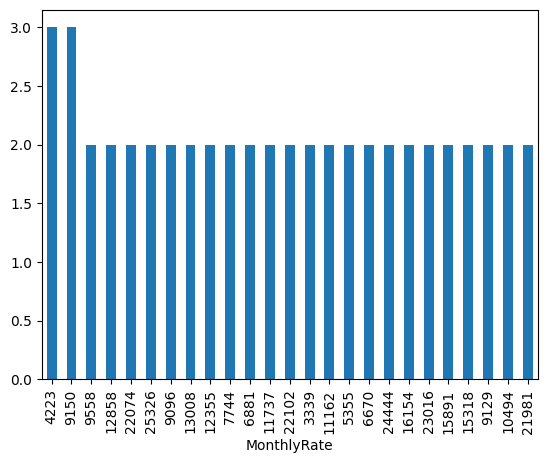

NumCompaniesWorked (int64): 10
1: 521
0: 197
3: 159
2: 146
4: 139


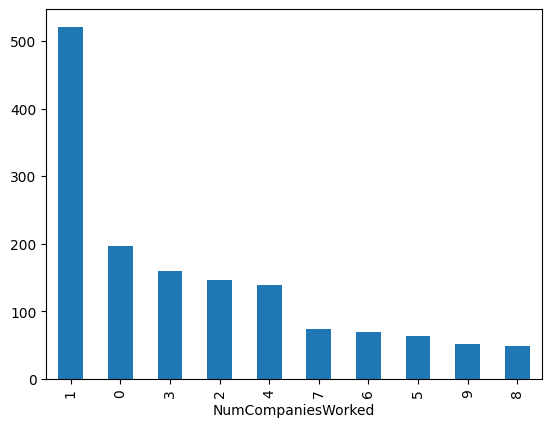

Over18 (object): 1
Y: 1470


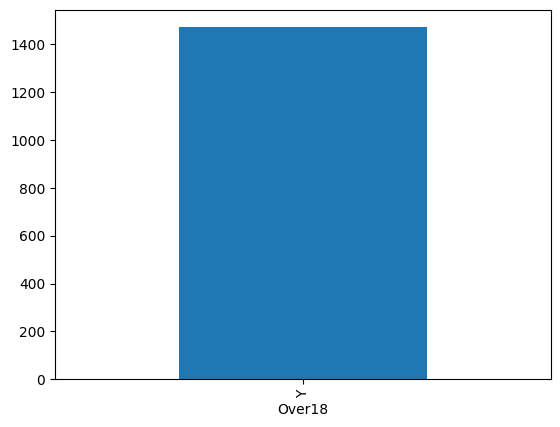

OverTime (object): 2
No: 1054
Yes: 416


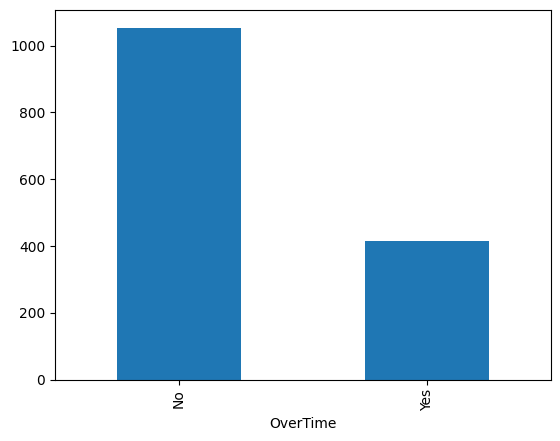

PercentSalaryHike (int64): 15
11: 210
13: 209
14: 201
12: 198
15: 101


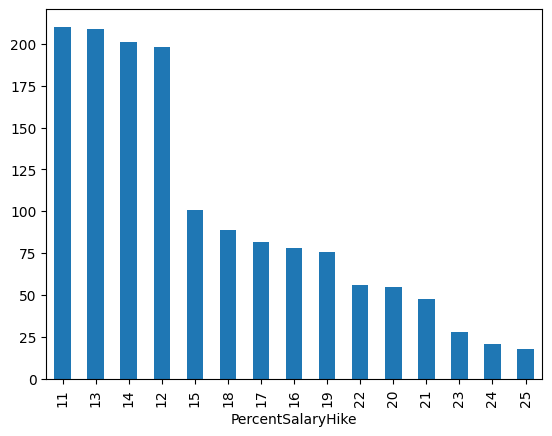

PerformanceRating (int64): 2
3: 1244
4: 226


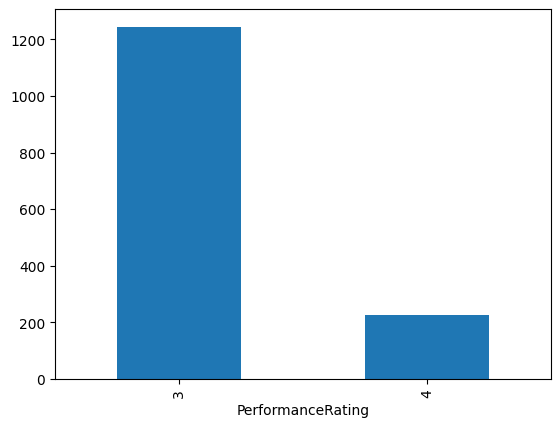

RelationshipSatisfaction (int64): 4
3: 459
4: 432
2: 303
1: 276


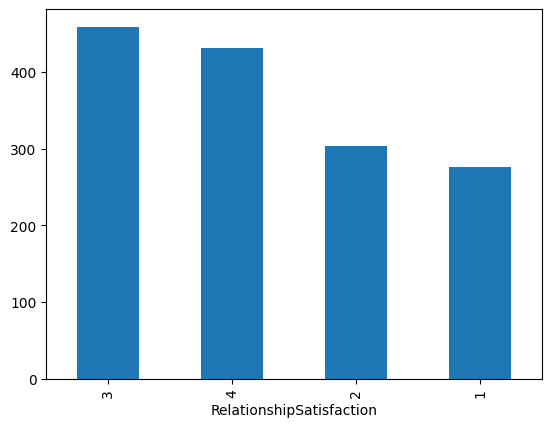

StandardHours (int64): 1
80: 1470


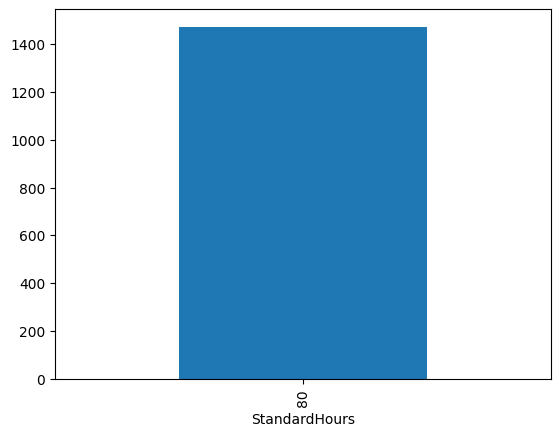

StockOptionLevel (int64): 4
0: 631
1: 596
2: 158
3: 85


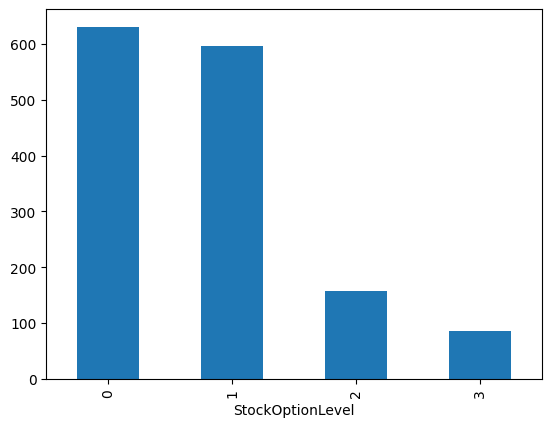

TotalWorkingYears (int64): 40
10: 202
6: 125
8: 103
9: 96
5: 88


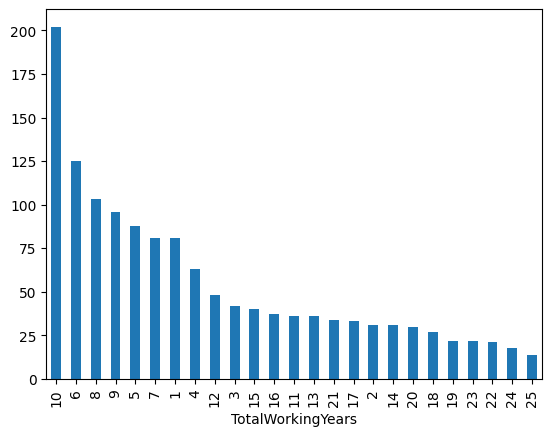

TrainingTimesLastYear (int64): 7
2: 547
3: 491
4: 123
5: 119
1: 71


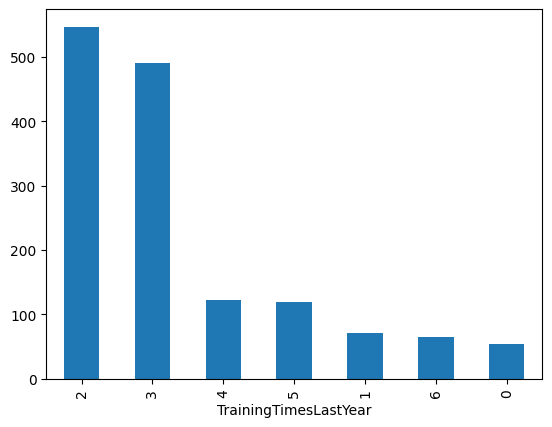

WorkLifeBalance (int64): 4
3: 893
2: 344
4: 153
1: 80


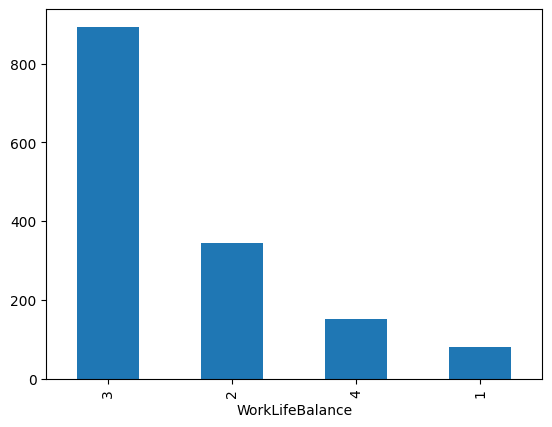

YearsAtCompany (int64): 37
5: 196
1: 171
3: 128
2: 127
10: 120


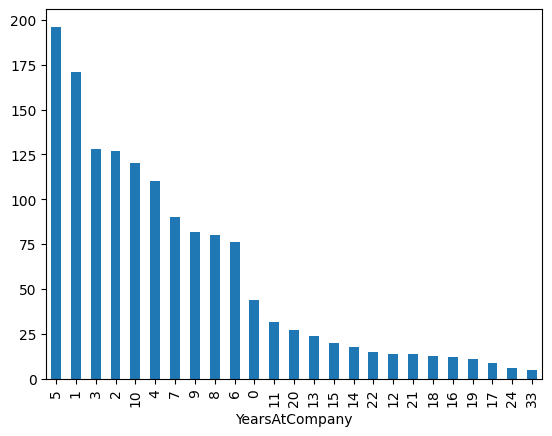

YearsInCurrentRole (int64): 19
2: 372
0: 244
7: 222
3: 135
4: 104


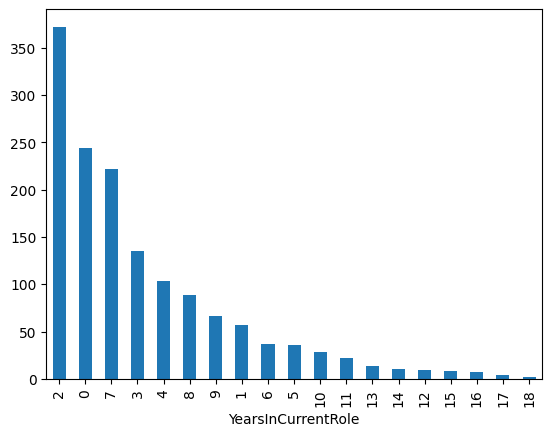

YearsSinceLastPromotion (int64): 16
0: 581
1: 357
2: 159
7: 76
4: 61


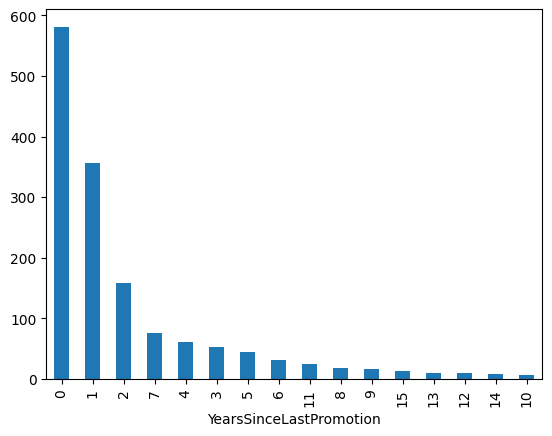

YearsWithCurrManager (int64): 18
2: 344
0: 263
7: 216
3: 142
8: 107


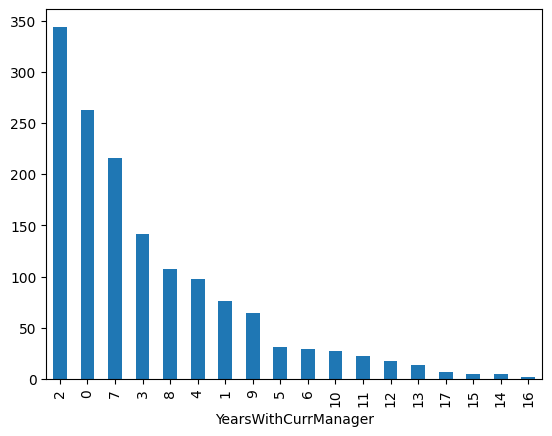

In [7]:
top_n = 5
for col in df.columns[1:]:
    uniq_top = df[col].value_counts().iloc[:top_n].items()
    print(f'{col} ({df[col].dtype}): {len(set(df[col].values))}')
    print('\n'.join([f'{key}: {val}' for key, val in uniq_top]))
    df[col].value_counts().iloc[:top_n*5].plot(kind='bar')
    plt.show()